# Chapter 8: Convolutional Neural Network Architectures
## Lab 8: Implementation of Inception-v3 Network

This chapter presents how to implement Inception-v3 network for image classification. The objective can be accomplished by using the TensorFlow library introduced in the previous chapters, but it takes time because of complex network architecture. The following introduces two methods, namely, Keras Application and TensorFlow Hub for building Inception-v3 network faster and more effectively. 


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-DL/blob/master/Lab8.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

---
## Keras Applications

Keras Applications is the applications module of Keras library, providing network declarations and pre-trained weights for the popular architectures such as Xception, VGG, ResNet, Inception, and so on. 

### 1. Create Inception-v3 network with Keras Applications

- Input size (default): (299, 299, 3)
- Weight (default): imagenet
- Output category (default): 1000 categories

In [3]:
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 8s 0us/step


In [4]:
# show Inception_v3 architecture
model.summary()  

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

•	Write the Inception-v3 network for displaying on TensorBoard:

In [9]:
model_tb = tf.keras.callbacks.TensorBoard(log_dir='lab8-logs-inceptionv3-keras')
model_tb.set_model(model)

In [10]:
# Open TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
#Open log file on TensorBoard
%tensorboard --port 9600 --logdir lab8-logs-inceptionv3-keras

Reusing TensorBoard on port 9600 (pid 7172), started 0:01:28 ago. (Use '!kill 7172' to kill it.)

### 2. Making prediction

a)	Data processing

For each network model, Keras Applications provides the corresponding functions for processing data.

-	preprocess_input: For processing input data following the format the network model requires. The input format of each model can be different. For example, some models require input image with the values range from -1 to +1, others use the value range from 0 to 1, and so on. 

-	decode_predictions: For decoding the predictions of the pre-trained models and mapping the prediction values to the actual class names.


•	Import data pre-processing and decoding functions:

In [12]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

b)	Reading data

•	Create a function for reading data:

In [13]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # Read file
    img_decode = tf.image.decode_image(img_string)  # Decode files in image format
    img_decode = tf.image.resize(img_decode, resize)  # Resize the image to the network input size
    # increase the dimension of the image to 4 (batch, height, width, channels)
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

•	Read an image by using “read_img” funtion:

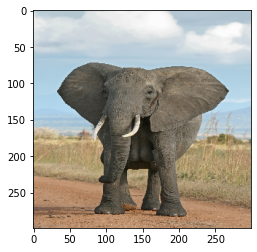

In [14]:
img_path = 'image/elephant.jpg'
img = read_img(img_path)  # Read the image through the function just created
plt.imshow(tf.cast(img, tf.uint8)[0])  # Display the image

c)	Using pre-trained model for prediction

In [15]:
img = preprocess_input(img)  # Image pre-processing
preds = model.predict(img)  # image prediction
print("Predicted:", decode_predictions(preds, top=3)[0])  # Show the three categories with the highest output prediction 

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.8037862), ('n01871265', 'tusker', 0.12163912), ('n02504013', 'Indian_elephant', 0.004299273)]


---
## TensorFlow Hub

TensorFlow Hub is a repository where the trained machine learning models are available for downloading and reusing with a minimum amount of code. There are various pre-trained models are provided through the “tfhub.dev” repository such as image classification models, text embedding models. The official website of TensorFlow Hub is https://tfhub.dev/

Install:
```
pip install tensorflow-hub
```



### 1. Create Inception-v3 network with TensorFlow Hub

Model:
https://tfhub.dev/google/tf2-preview/inception_v3/classification/2

num_classes = 1001 classes of the classification from the original training
 
Image:height x width = 299 x 299 pixels, 3 RGB color values in the range 0~1

labels file: https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt


a) Import packages

In [16]:
import tensorflow as tf
import tensorflow_hub as hub

In [17]:
# URL of the pre-trained Inception-v3 model
module_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

# Buiding Inception-v3
model = tf.keras.Sequential([
    # hub.KerasLayer wraps the saved Inception-v3 model as a Keras layer
    hub.KerasLayer(module_url, 
                  input_shape=(299, 299, 3),  
                   output_shape=(1001, ),   
                   name='Inception_v3')  
])

In [19]:
#Show the architecuture 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inception_v3 (KerasLayer)    (None, 1001)              23853833  
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


### 2.	Making prediction

a)	Reading data

•	Create a function for reading data:

In [20]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # Read file
    img_decode = tf.image.decode_image(img_string)    # Decode files in image format
    img_decode = tf.image.resize(img_decode, resize)  # Resize the image to the Inception-v3 input size
    img_decode = img_decode / 255.0  # Normalization
    # # expand dimension 
    img_decode = tf.expand_dims(img_decode, axis=0)  
    return img_decode

•	Reading the actual class names:

In [21]:
# Download ImageNet lable file
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# Reading data 
with open(labels_path) as file:
    lines = file.read().splitlines()
print(lines)  

imagenet_labels = np.array(lines) 

16384/10484 [==============================================] - 0s 0us/step
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', '

•	Read an image by using “read_img” function:

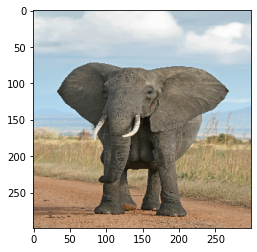

In [22]:
img_path = 'image/elephant.jpg'
img = read_img(img_path)  
plt.imshow(img[0])

b)	Using pre-trained model for prediction

In [23]:
preds = model.predict(img)  # image prediction
index = np.argmax(preds)  # Get the Index with the largest prediction result
print("Predicted:", imagenet_labels[index])  # print the predicted result

Predicted: African elephant


c)	Display three best predictions:

In [24]:
# Get the three indexes with the largest prediction results
top3_indexs = np.argsort(preds)[0, ::-1][:3]  
print("Predicted:", imagenet_labels[top3_indexs])  

Predicted: ['African elephant' 'tusker' 'Indian elephant']
